In [151]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use=(["science","notebook","grid"])
data_path="E:/datasets/heart.csv"



Reading the data 

In [152]:
data=pd.read_csv(data_path)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Cleaning the data

In [153]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [154]:
x=data.duplicated().sum()
if x>0:
    print("Dupluicates are persent in the data set ")
    data.drop_duplicates(inplace=True)
else:    
    print("There are no null values in the data")

There are no null values in the data


In [155]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Graphical analysis of the data

In [156]:
print("The columns in the data set is ")
x_features = list(data.columns)
x_features 

The columns in the data set is 


['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

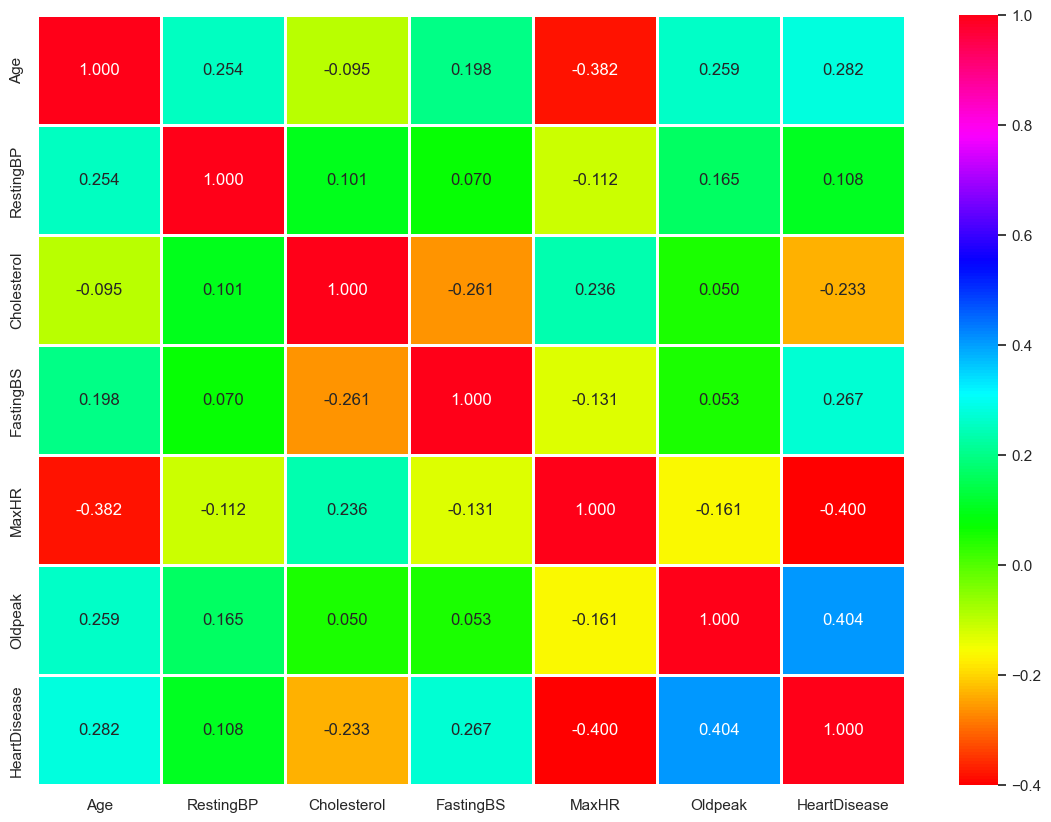

In [157]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='hsv', fmt='.3f', linewidths=2)
plt.show()


In [158]:
for feature in x_features:
    x=type(data[feature].values[0]) 
    if x==str:
        plt.figure(figsize=(5, 5))
        sns.countplot(x=feature,data=data)
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel("count")
    else:
        sns.displot(x=feature,data=data)
        plt.title(feature)
        plt.xlabel(feature)




Bar graph plotings

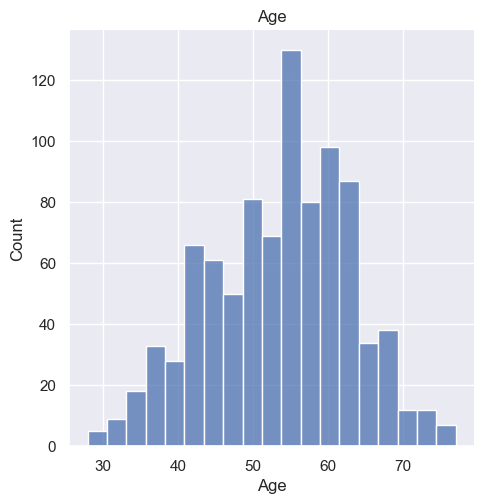

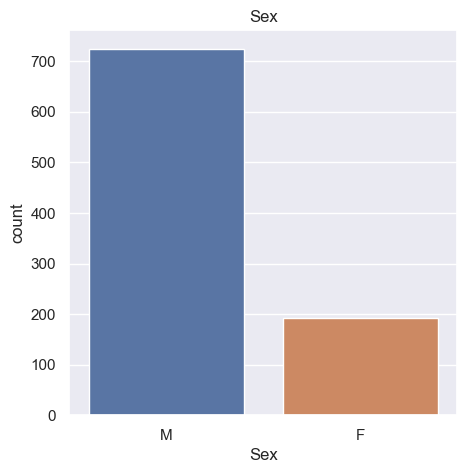

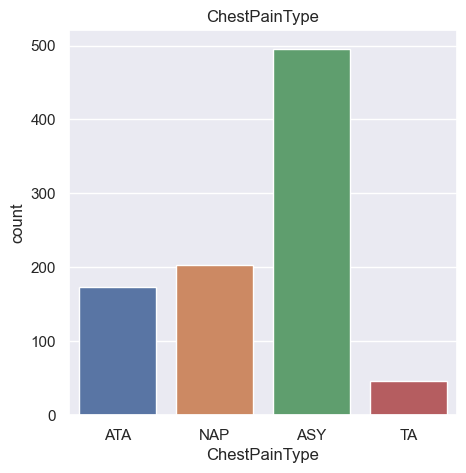

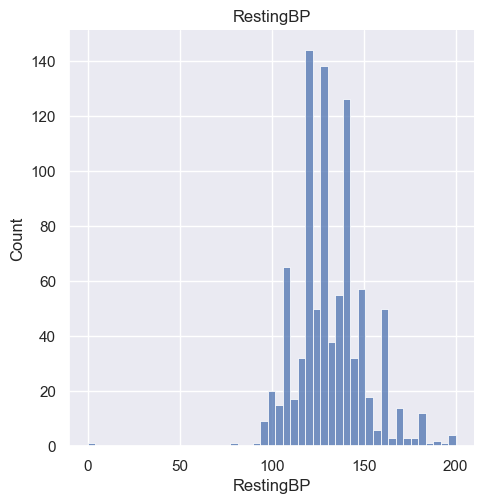

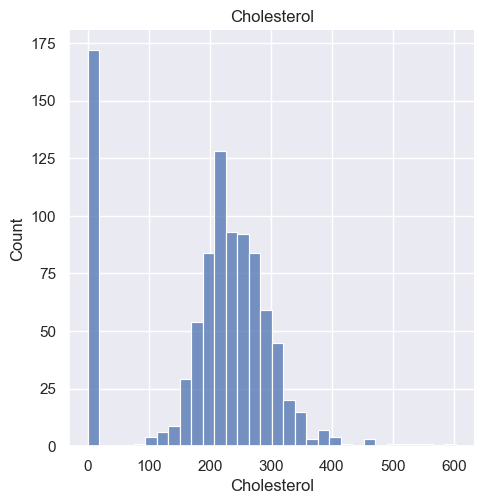

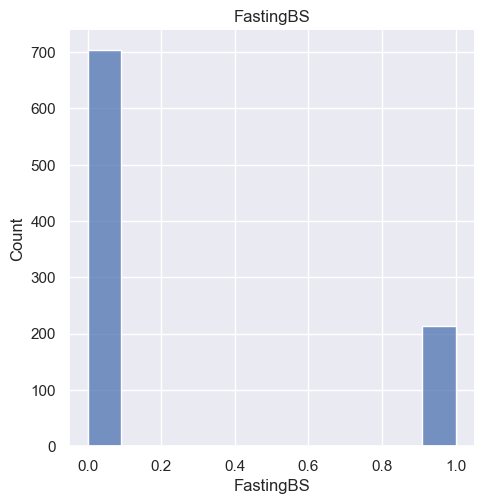

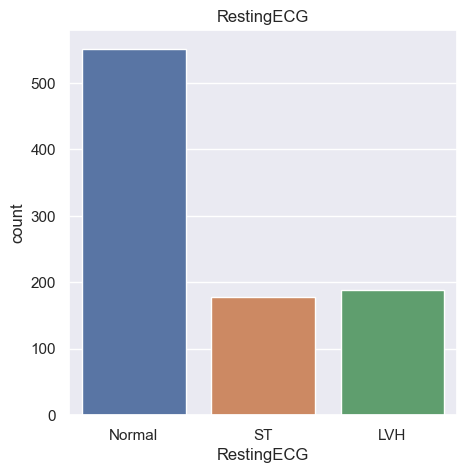

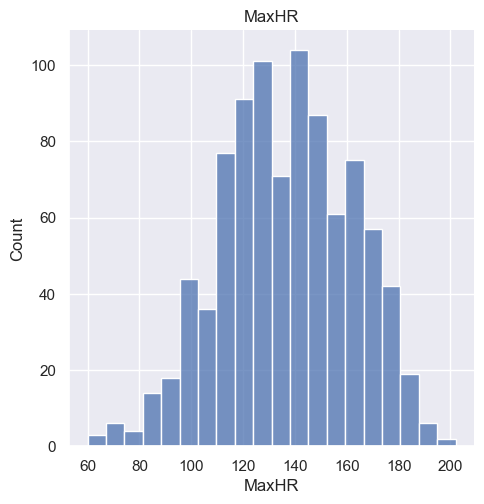

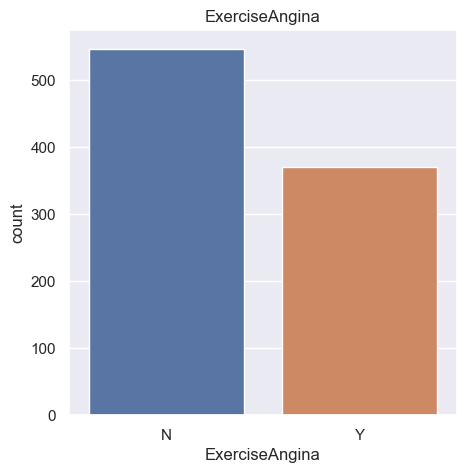

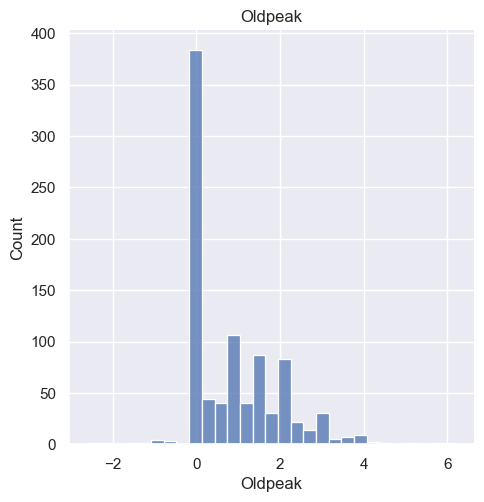

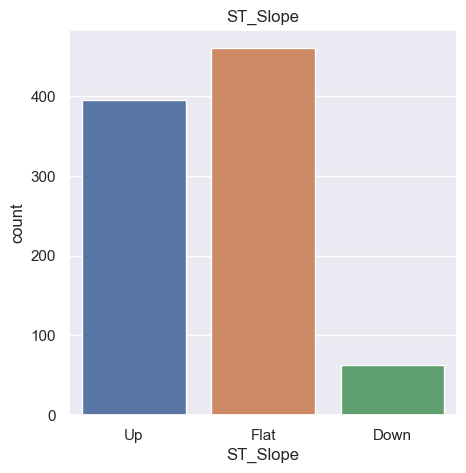

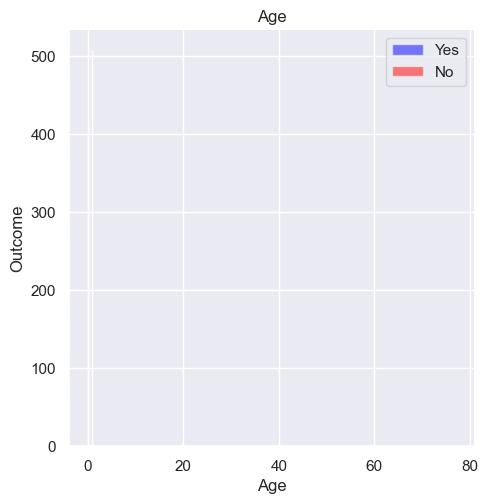

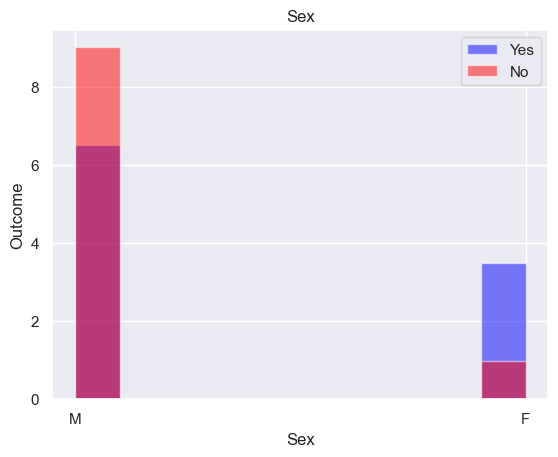

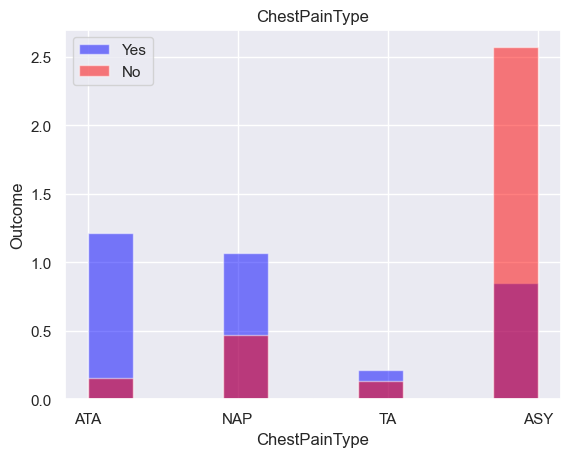

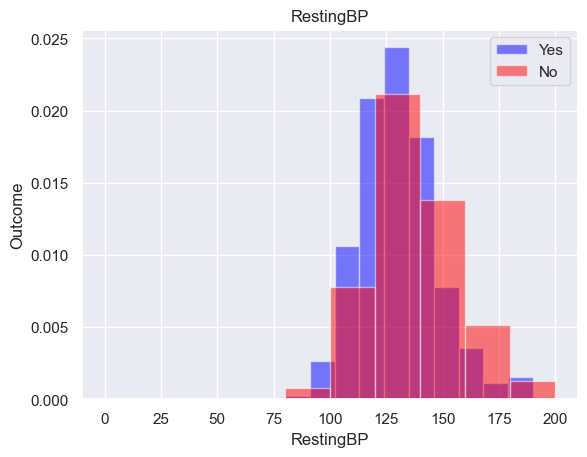

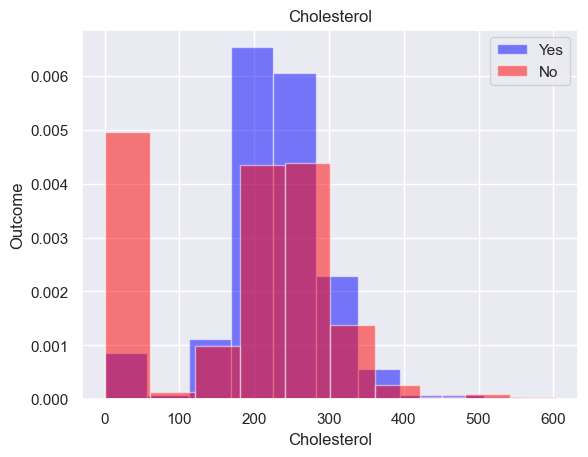

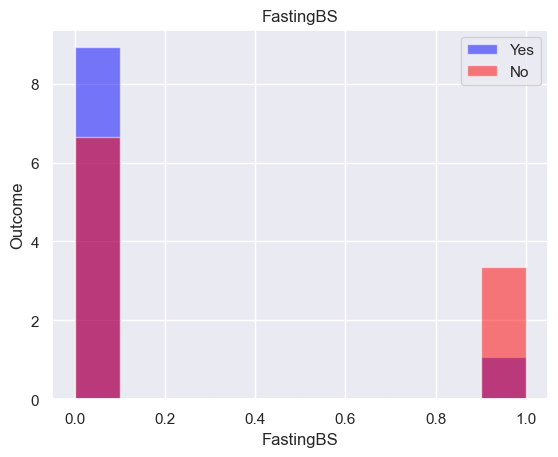

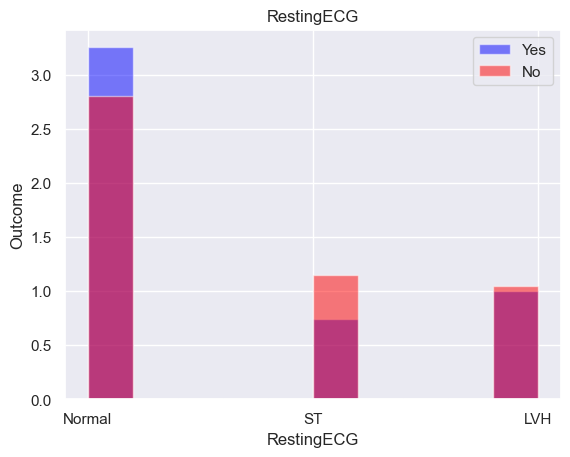

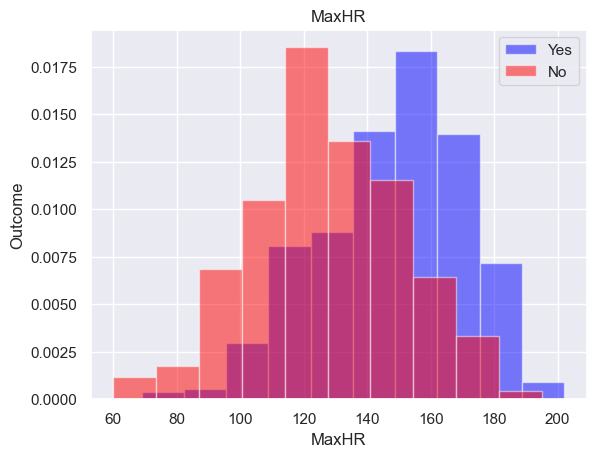

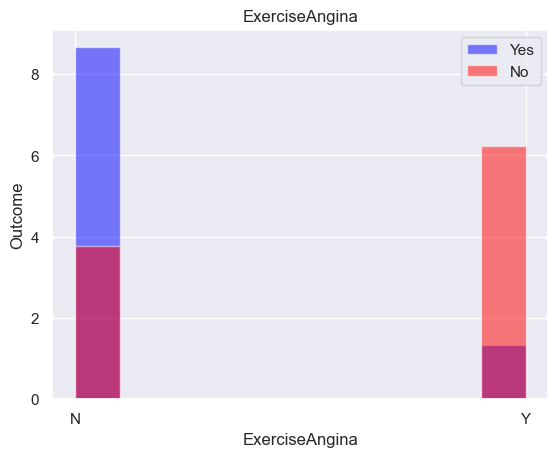

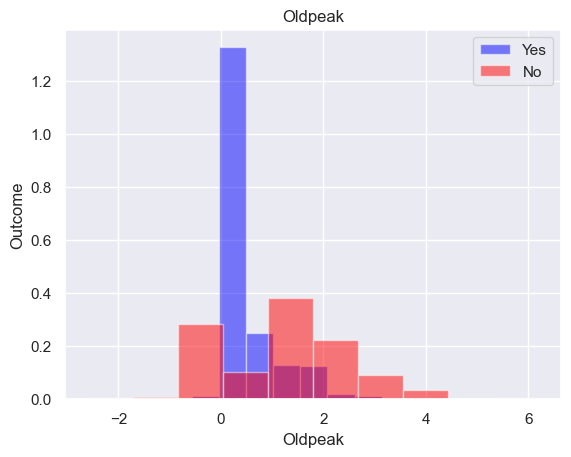

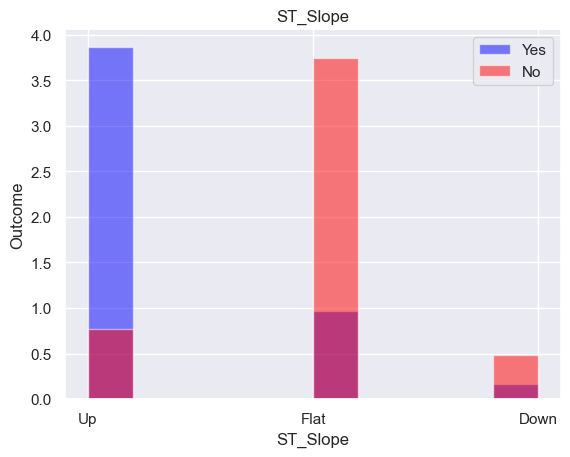

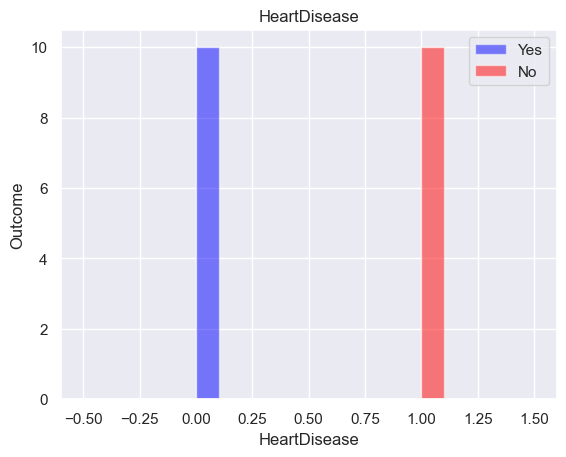

In [159]:
labels=list(data.columns)
for label in labels:
    plt.title(label)
    plt.hist(data[data["HeartDisease"] == 0][label], label="Yes", color="blue",
            alpha=0.5, density=True)
    plt.hist(data[data["HeartDisease"] == 1][label], label="No", color="red", 
            alpha=0.5, density=True)
    plt.xlabel(label)
    plt.ylabel("Outcome")
    plt.legend()
    plt.show()


Pair plots 

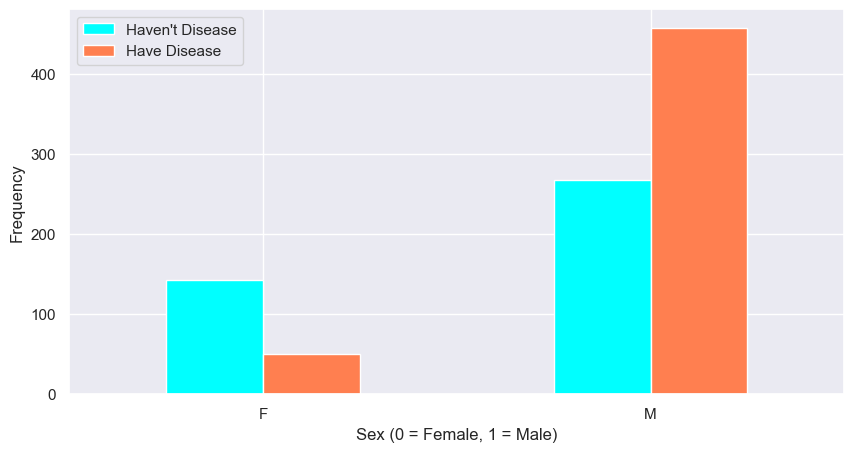

In [160]:
pd.crosstab(data["Sex"], data["HeartDisease"]).plot(
    kind="bar", figsize=(10, 5), color=['cyan', 'coral'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


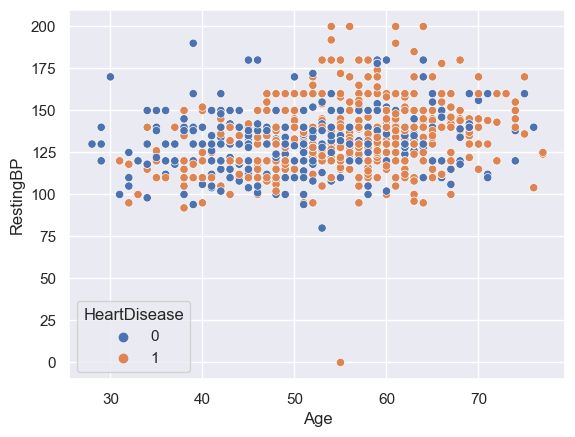

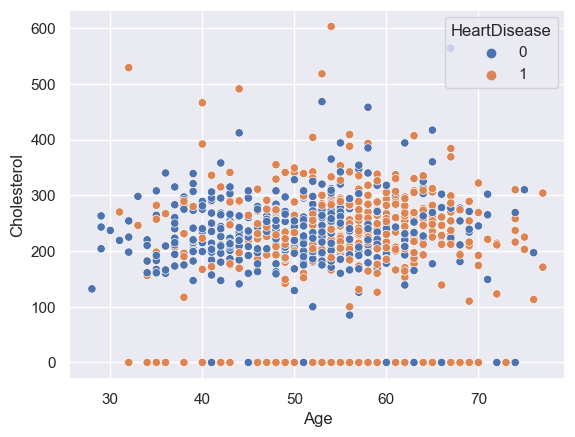

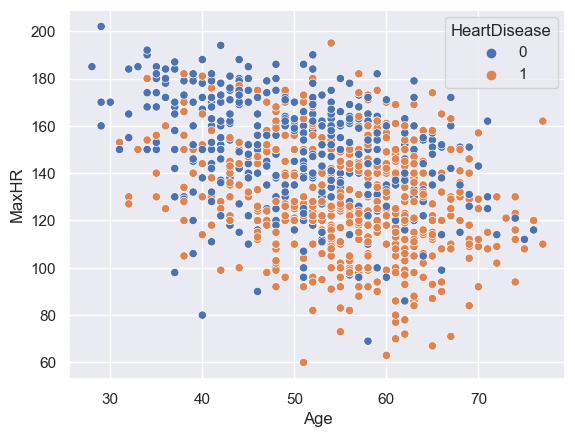

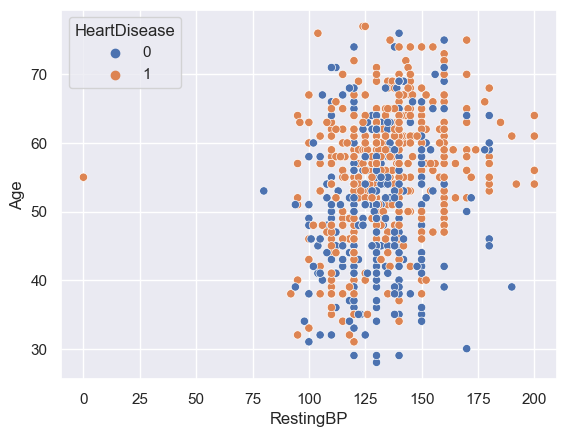

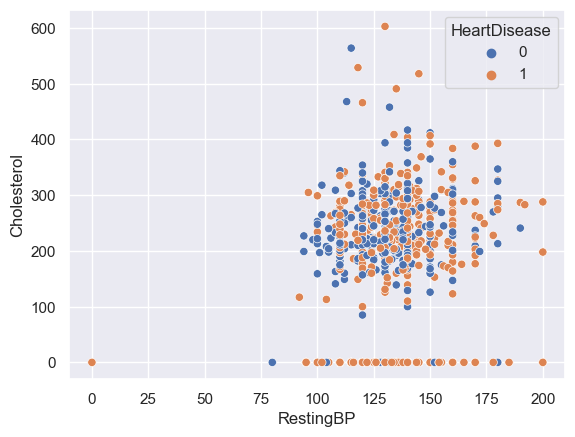

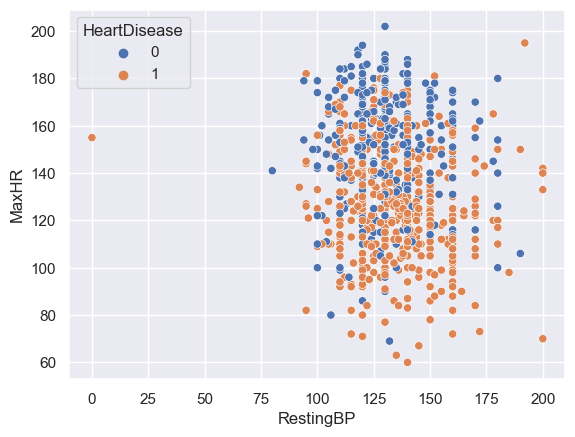

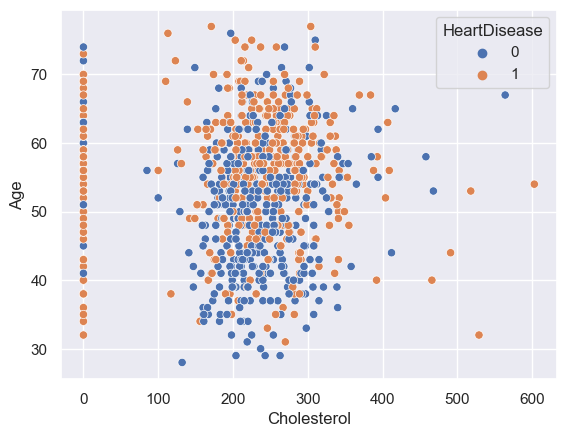

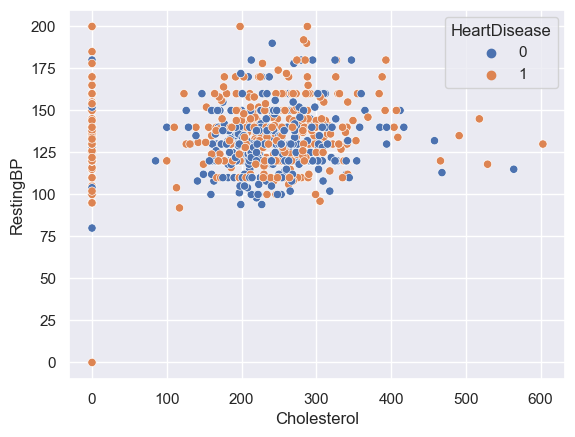

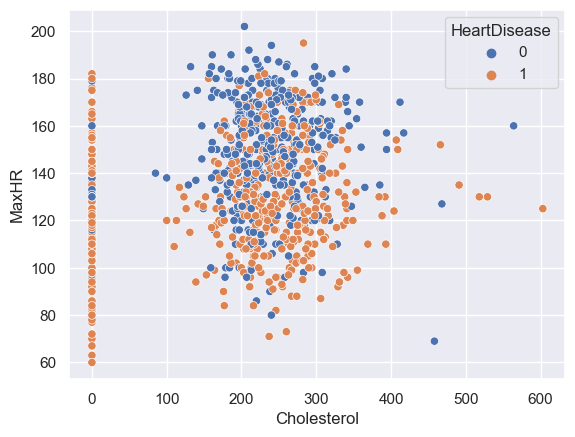

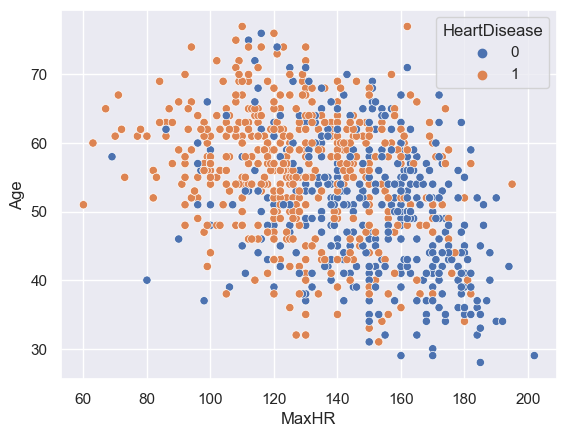

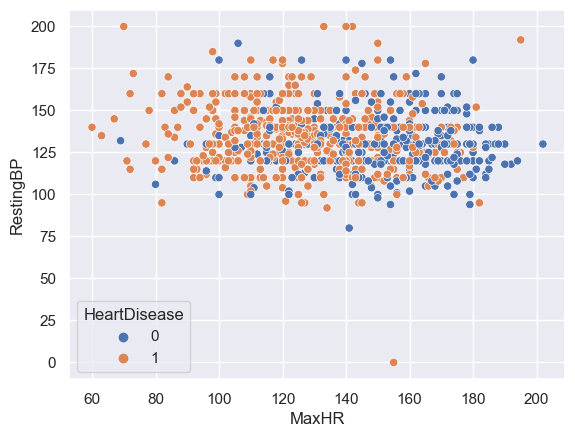

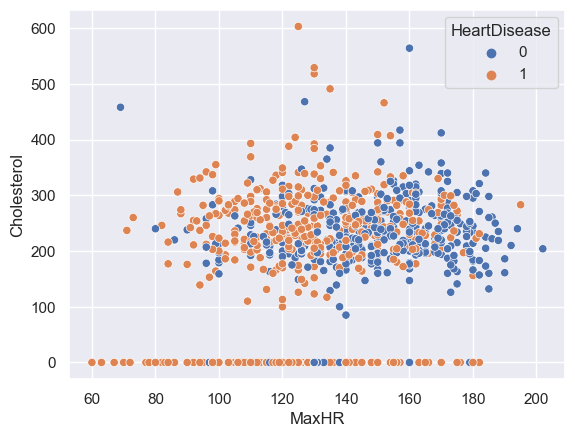

In [161]:
c=[]
for feature in x_features:
    x = type(data[feature].values[0])
    if x != str:
        c.append(feature)
c.remove("FastingBS")
c.remove("Oldpeak")
c.remove("HeartDisease")
for label1 in range(0, len(c)):
    for label2 in range(0, len(c)):
        if label1 != label2:
            sns.scatterplot(
                x=data[c[label1]], y=data[c[label2]], hue=data["HeartDisease"])
            plt.xlabel(c[label1])
            plt.ylabel(c[label2])
            plt.show()
               

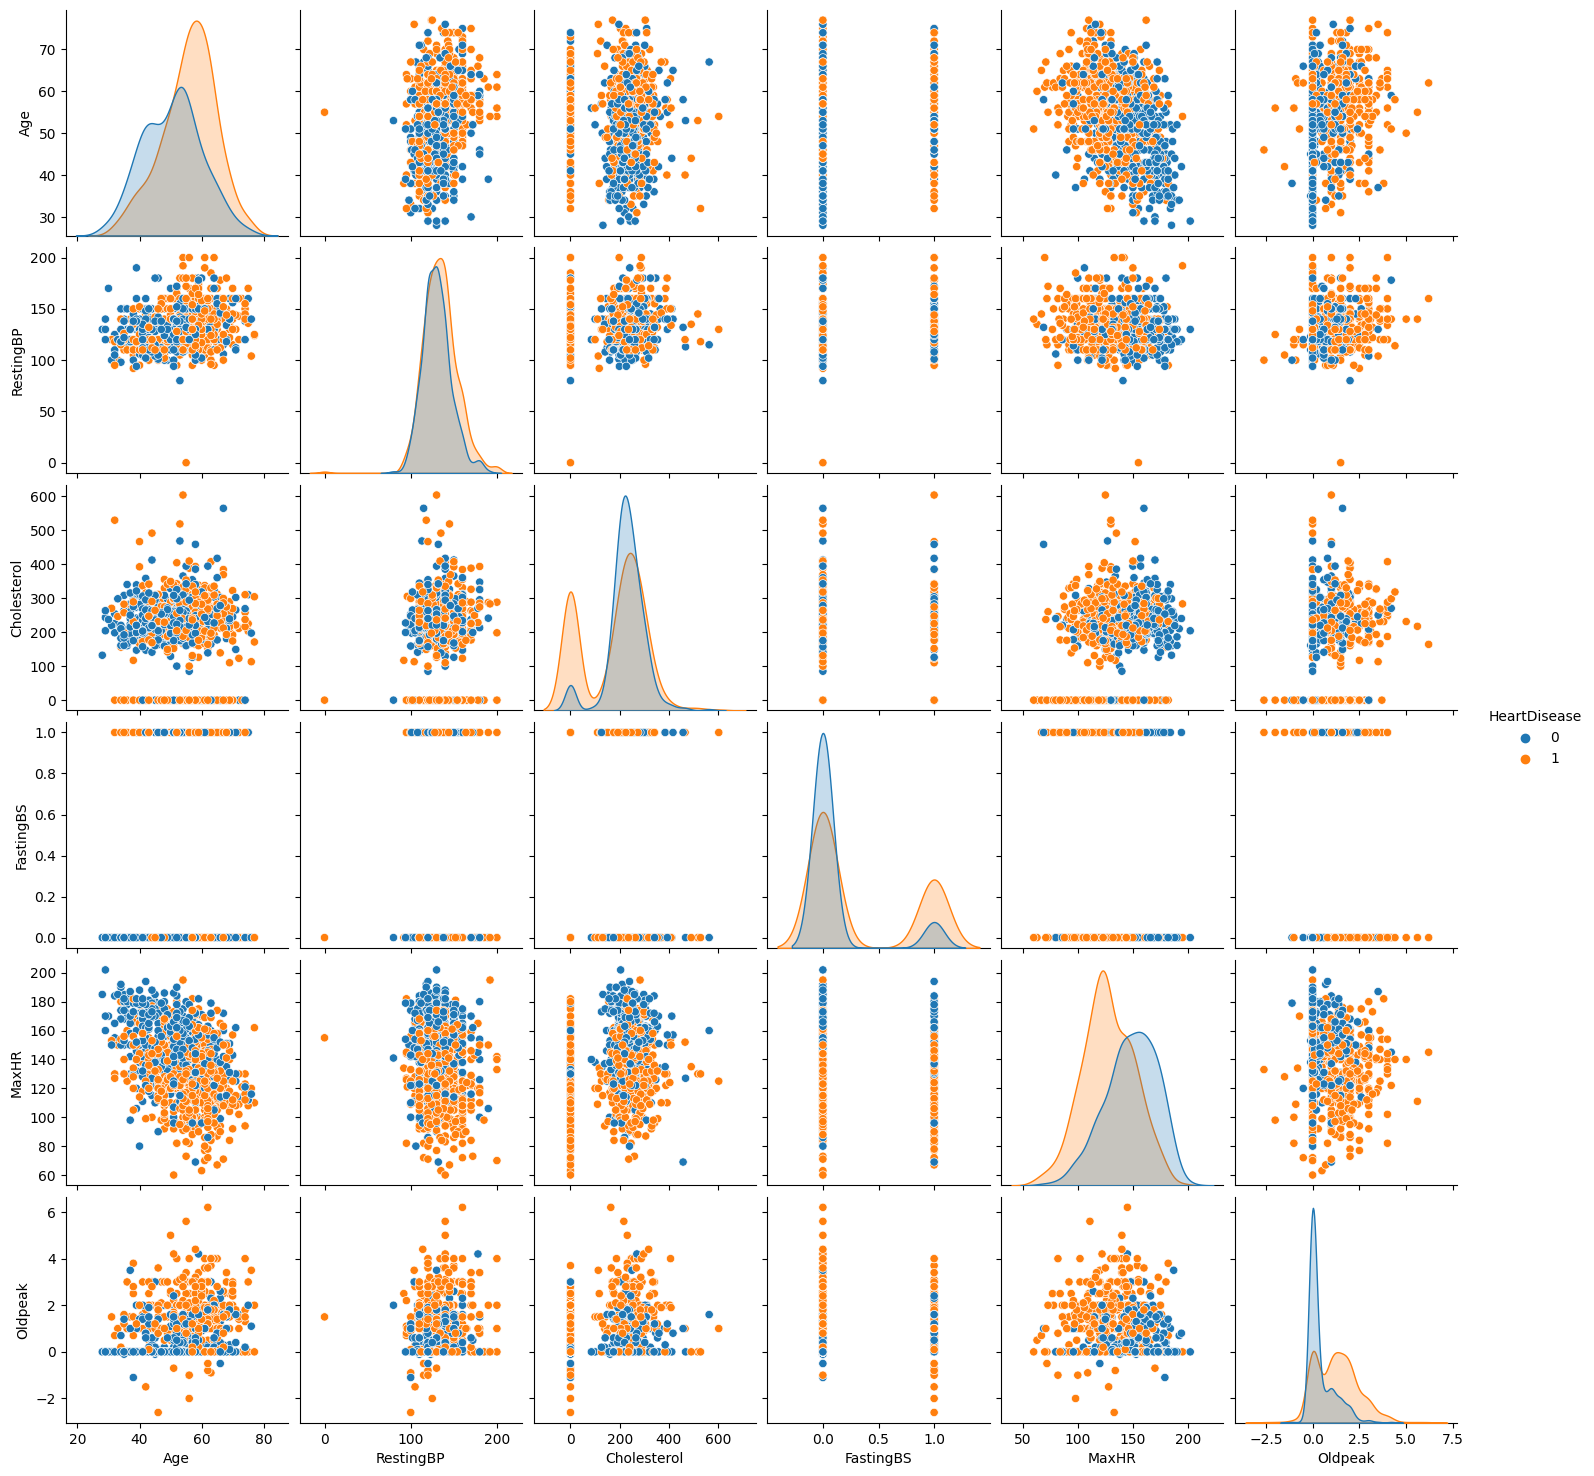

In [11]:
sns.pairplot(data,hue="HeartDisease")
plt.show()

Feature Sepearation

In [162]:
from sklearn.preprocessing import LabelEncoder 
lab=LabelEncoder()
c=[]
for feature in x_features:
    x = type(data[feature].values[0])
    if x ==str:
        c.append(feature)
        data1=data[c].values 
        for i in range(0,len(data1[0])):
            data1[:,i]=lab.fit_transform(data1[:,i])
cat_df=pd.DataFrame(data1,columns=c) 
cat_df          


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [163]:
col=cat_df.columns 
for i in col:
    data[i]=cat_df[i]
data    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [166]:
X_data1=data[x_features]
y_data1=data["HeartDisease"]

In [ ]:
X_data=data[x_features].values
y_data=data["HeartDisease"].values

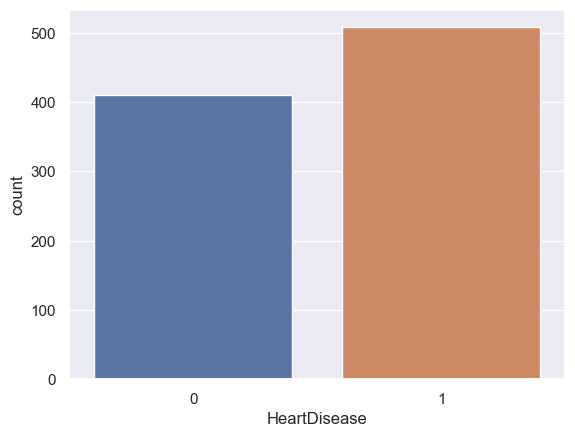

1    508
0    410
Name: HeartDisease, dtype: int64

In [167]:
sns.countplot(x="HeartDisease",data=data)
plt.show()
data["HeartDisease"].value_counts()

Smote Analysis

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
oversample = SMOTE(random_state=101)
X_data, y_data = oversample.fit_resample(X_data, y_data)
counter=Counter(y_data)
counter

Counter({0: 508, 1: 508})

Non tree based algorithms 

In [122]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
## using for hyper parameter tuning 
from sklearn.model_selection import GridSearchCV 
##sing machine learning pipelines for automation 
from sklearn.pipeline import make_pipeline 
from  sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,train_size=0.8,random_state=101)

In [124]:
std=StandardScaler()## Scaling down the input values for  better performence of model
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       103

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



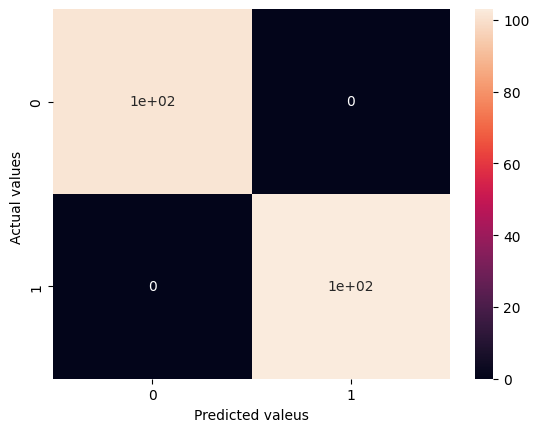

In [125]:
## logistic regression
logreg=LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
logreg.score(X_test,y_test)
class_report=classification_report(y_test,y_pred)
print(class_report)
con_matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(con_matrix,annot=True)
plt.xlabel("Predicted valeus")
plt.ylabel("Actual values ")
plt.show()


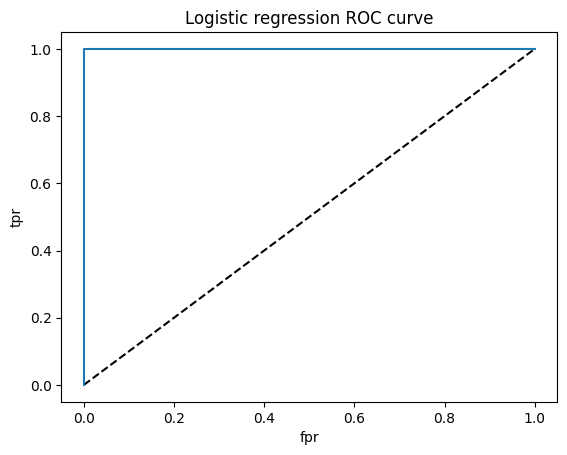

In [126]:
### ROC CURVE
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic regression ROC curve')
plt.show()


Grid search for svm 



In [127]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([ ("svm", SVC())])


In [128]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))


Best cross-validation accuracy: 1.00
Test set score: 1.00
Best parameters: {'svm__C': 1, 'svm__gamma': 0.01}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       103

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



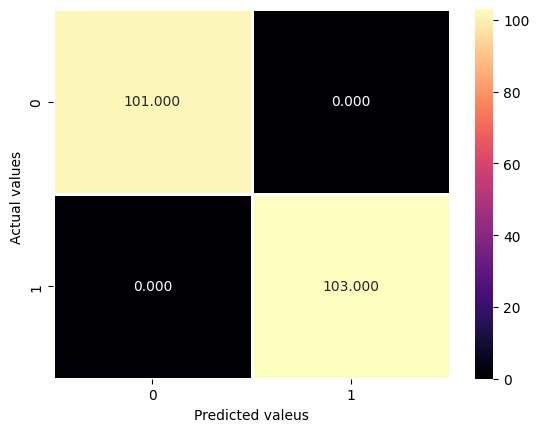

In [129]:
y_pred=grid.predict(X_test)
acc=accuracy_score(y_pred,y_test)
classd=classification_report(y_test,y_pred)
print(classd)
con=confusion_matrix(y_pred,y_test)
sns.heatmap(con,annot=True,cmap='magma', fmt='.3f', linewidths=2)
plt.xlabel("Predicted valeus")
plt.ylabel("Actual values ")
plt.show()


In [130]:
#knn
train_scores=[]
test_scores=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

    


In [131]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.0392156862745 % and k = [1]


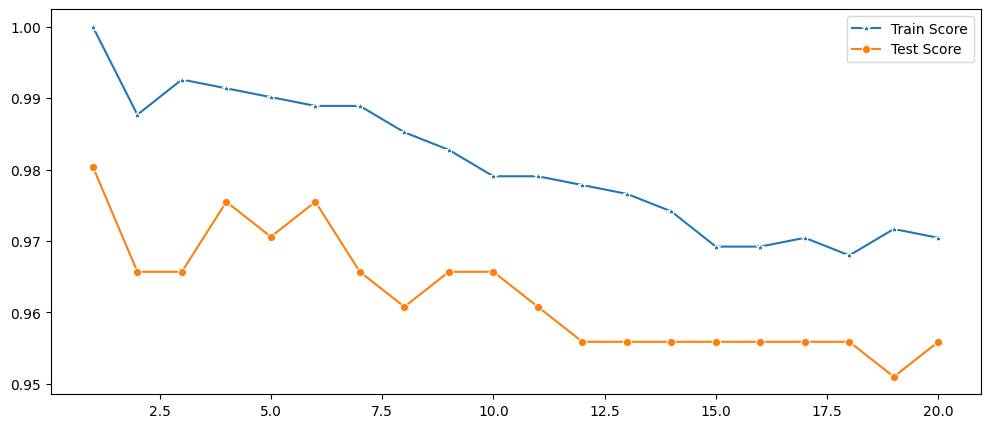

In [132]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,21),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,21),y=test_scores,marker='o',label='Test Score')
plt.show()

In [133]:
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9607843137254902

In [134]:
y_pred=knn.predict(X_test)
clas=classification_report(y_pred,y_test)
print(clas)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       101
           1       0.96      0.96      0.96       103

    accuracy                           0.96       204
   macro avg       0.96      0.96      0.96       204
weighted avg       0.96      0.96      0.96       204



Tree based algorithms


In [135]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 


In [137]:
## Random forest classifier 
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [168]:
feature_scores = pd.Series(forest.feature_importances_,
                           index=X_data1.columns).sort_values(ascending=False)

feature_scores


HeartDisease      0.583867
ST_Slope          0.130897
ChestPainType     0.084667
ExerciseAngina    0.058032
MaxHR             0.030698
Cholesterol       0.029625
Oldpeak           0.028243
Sex               0.016081
Age               0.012838
RestingBP         0.012608
FastingBS         0.007256
RestingECG        0.005187
dtype: float64

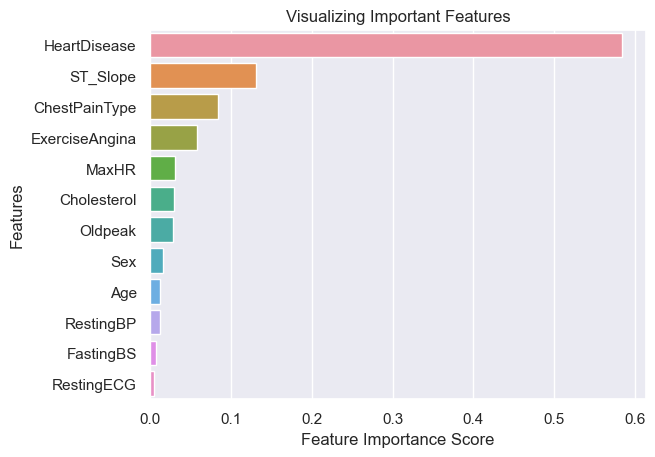

In [169]:
sns.set()
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()


In [170]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=forest.predict(X_test)
ac=accuracy_score(y_test,y_pred)
ac

1.0